In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('AmazonExamDataset.csv')
df = df.drop(columns=['Last_ Purchase_Category'])
df = df.rename(columns={'Credit_Card_Eligible': 'Eligible'})

print(df)

    Age Prime_Member   Last_Purchase_cost Eligible
0    25           Yes                 350      Yes
1    34            No                1200      Yes
2    19            No                  20       No
3    45           Yes                4000      Yes
4    30            No                 150       No
5    40           Yes                 900      Yes
6    23            No                  25       No
7    55           Yes                8000      Yes
8    37           Yes                2000      Yes
9    29            No                  50       No
10   33           Yes                 300      Yes
11   48           Yes                6000      Yes
12   21            No                  30       No
13   60           Yes                2500      Yes
14   38           Yes                1500      Yes
15   26            No                 120       No
16   32           Yes                 500      Yes
17   27            No                 100       No
18   36           Yes          

# Explore the Dataset

In [2]:
print(df.info())
print(df.describe())
df.columns = df.columns.str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 25 non-null     int64 
 1   Prime_Member        25 non-null     object
 2   Last_Purchase_cost  25 non-null     int64 
 3   Eligible            25 non-null     object
dtypes: int64(2), object(2)
memory usage: 932.0+ bytes
None
             Age  Last_Purchase_cost
count  25.000000           25.000000
mean   35.240000         1788.600000
std    11.087831         2359.726997
min    19.000000           20.000000
25%    27.000000          120.000000
50%    33.000000          500.000000
75%    42.000000         2500.000000
max    60.000000         8000.000000


In [3]:
df['Prime_Member'] = df['Prime_Member'].str.strip()  # Remove leading/trailing spaces
df['Prime_Member'] = df['Prime_Member'].map({'Yes': 1, 'No': 0})
df['Eligible'] = df['Eligible'].map({'Yes': 1, 'No': 0})
print(df)

    Age  Prime_Member  Last_Purchase_cost  Eligible
0    25             1                 350         1
1    34             0                1200         1
2    19             0                  20         0
3    45             1                4000         1
4    30             0                 150         0
5    40             1                 900         1
6    23             0                  25         0
7    55             1                8000         1
8    37             1                2000         1
9    29             0                  50         0
10   33             1                 300         1
11   48             1                6000         1
12   21             0                  30         0
13   60             1                2500         1
14   38             1                1500         1
15   26             0                 120         0
16   32             1                 500         1
17   27             0                 100         0
18   36     

# Objective 1: Determine if a user should get a credit card using logistic regression

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# split data
X = df.drop(columns=['Eligible'])
y = df['Eligible']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.875
Confusion Matrix:
 [[4 0]
 [1 3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



# Objective 2: Determine which products to advertise to the user by using K-Means clustering to segment users by their purchase behavior.

Recommend products from similar clusters or use purchase history for collaborative filtering

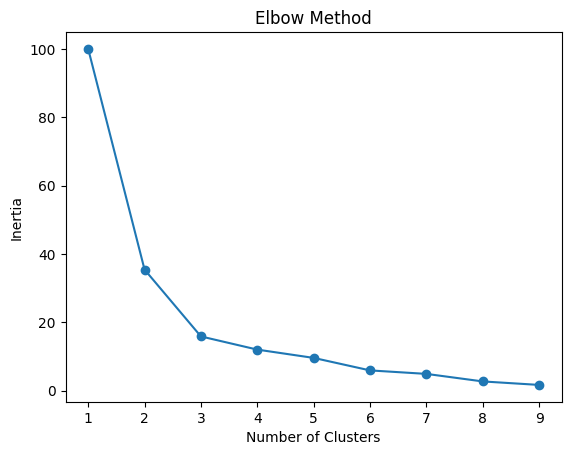

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


               Age  Prime_Member  Last_Purchase_cost  Eligible
Cluster                                                       
0        25.700000         0.100           96.500000       0.0
1        34.375000         0.875          968.750000       1.0
2        49.857143         1.000         5142.857143       1.0


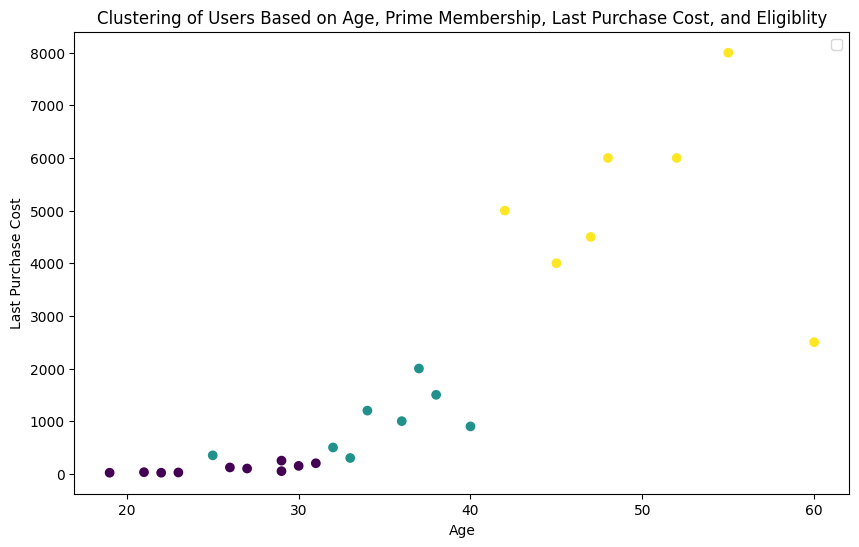

New User Details: Age = 29, Prime Member = 1, Last Purchase Cost = 250, Eligible = 1
Recommended Cluster for the new user: 1


/Users/xochitl/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:
from sklearn.cluster import KMeans

X = df[['Age', 'Prime_Member', 'Last_Purchase_cost', 'Eligible']]

# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# plotting the elbow curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# apply K-Means with the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df.groupby('Cluster').mean())

# visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Age'], df['Last_Purchase_cost'], c=df['Cluster'], cmap='viridis', marker='o')

plt.xlabel('Age')
plt.ylabel('Last Purchase Cost')
plt.title('Clustering of Users Based on Age, Prime Membership, Last Purchase Cost, and Eligiblity')
plt.legend()
plt.show()


# new user
new_user = [[29, 1, 250, 1]]  # Example: Age=29, Prime_Member=Yes, Last_Purchase=250, Eligible=Yes
print(f"New User Details: Age = {new_user[0][0]}, Prime Member = {new_user[0][1]}, Last Purchase Cost = {new_user[0][2]}, Eligible = {new_user[0][3]}")

new_user_scaled = scaler.transform(new_user)
cluster = kmeans.predict(new_user_scaled)
print(f"Recommended Cluster for the new user: {cluster[0]}")
